# Traffic prediction: Non-linear Model
We want to predict the speed of car in 101 highway based on the time of the day. A camera in the highway has recorded the following data for 20 cars during a day. The suggested model represented as
$$
h_\theta(x) = 70+ \theta_0 sin(\theta_1 x)
$$
where x is the time of the day. To make it easier, I reprsented x with hour units started from mid-night. So $1.5$ means 1 hour and 30 mintues after midnight.The data set is as follow:

<IPython.core.display.Javascript object>


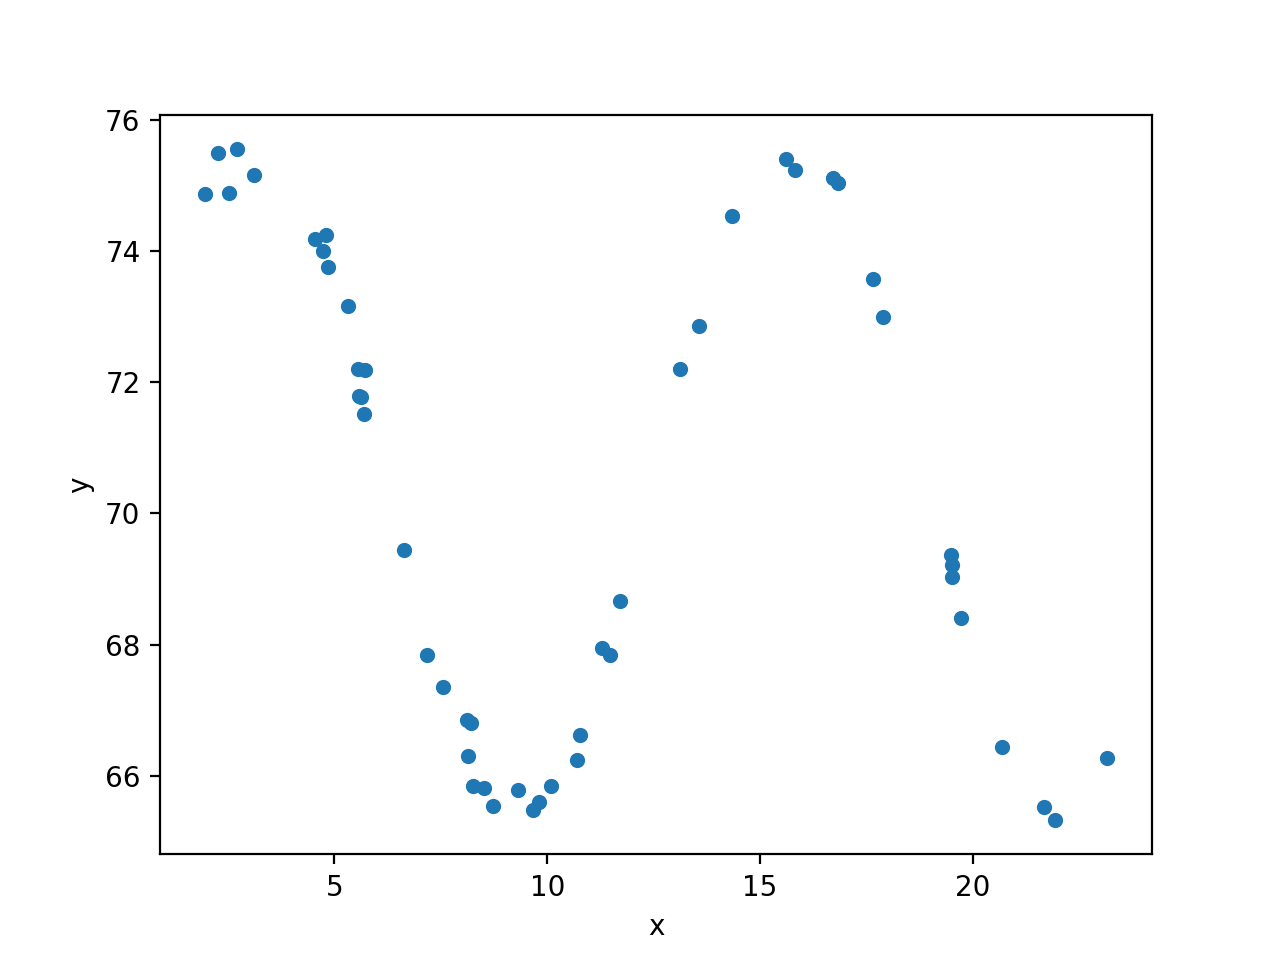

,x,y
0,1.966973,74.881738
1,2.260659,75.505481
2,2.535037,74.892121
3,2.703667,75.558847
4,3.112052,75.167692


In [29]:
%matplotlib nbagg
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt


df = pd.read_excel('./Book1.xlsx')
df.plot(kind='scatter', x='x', y='y')

df.head()

We first compare two different prediction models, M1 and M2. In model M1, we choose
$$
\theta_0 = 10, \theta_1 =.3
$$
and in M2 we have $\theta_0 = 6, \theta_1 =.4$. First, let's check the prediction of these two models for the speed of the car at $x= 2.26065$. Model M1, will predict the speed of the car is 
$$y = 75.505481, 
x= 2.26065$$

$$\hat y_1 = 70 + 10*sin(.3 * 2.26065) = 76.27$$
, and Model M2 predicts that as

$$\hat y_2 = 70 + 6*sin(.4 * 2.26065) = 74.7158$$

The correct speed was $y = 75.505481$. So the prediction error in M1 is $y-\hat y_1 = -0.7684$ and error for M2 is $y-\hat y_2 = -0.789673$


In [30]:
import math 
y = 75.505481
x= 2.26065
y1=70 + 10*math.sin(.3 * 2.26065)
y2=70 + 6*math.sin(.4 * 2.26065)
print((y,y1,y2) )
print('Error M1:  '+str(y-y1))
print('Error M2:  '+str(y-y2))

(75.505481, 76.27388481711822, 74.71580711405225)
Error M1:  -0.768403817118
Error M2:  0.789673885948


We can do the same error calcultions for all other values of x.

In [31]:
df['M1'] = 70+10*np.sin(df['x']*.3)
df['M2'] = 70+6*np.sin(df['x']*.4)
df['Error M1'] = df['y'] - df['M1']
df['Error M2'] = df['y'] - df['M2']

df.head()

,x,y,M1,M2,Error M1,Error M2
0,1.966973,74.881738,75.564374,74.248538,-0.682636,0.633200
1,2.260659,75.505481,76.273906,74.715820,-0.768425,0.789661
2,2.535037,74.892121,76.892918,75.093762,-2.000797,-0.201641
3,2.703667,75.558847,77.250453,75.295889,-1.691606,0.262958
4,3.112052,75.167692,78.037762,75.684033,-2.870070,-0.516341


<IPython.core.display.Javascript object>


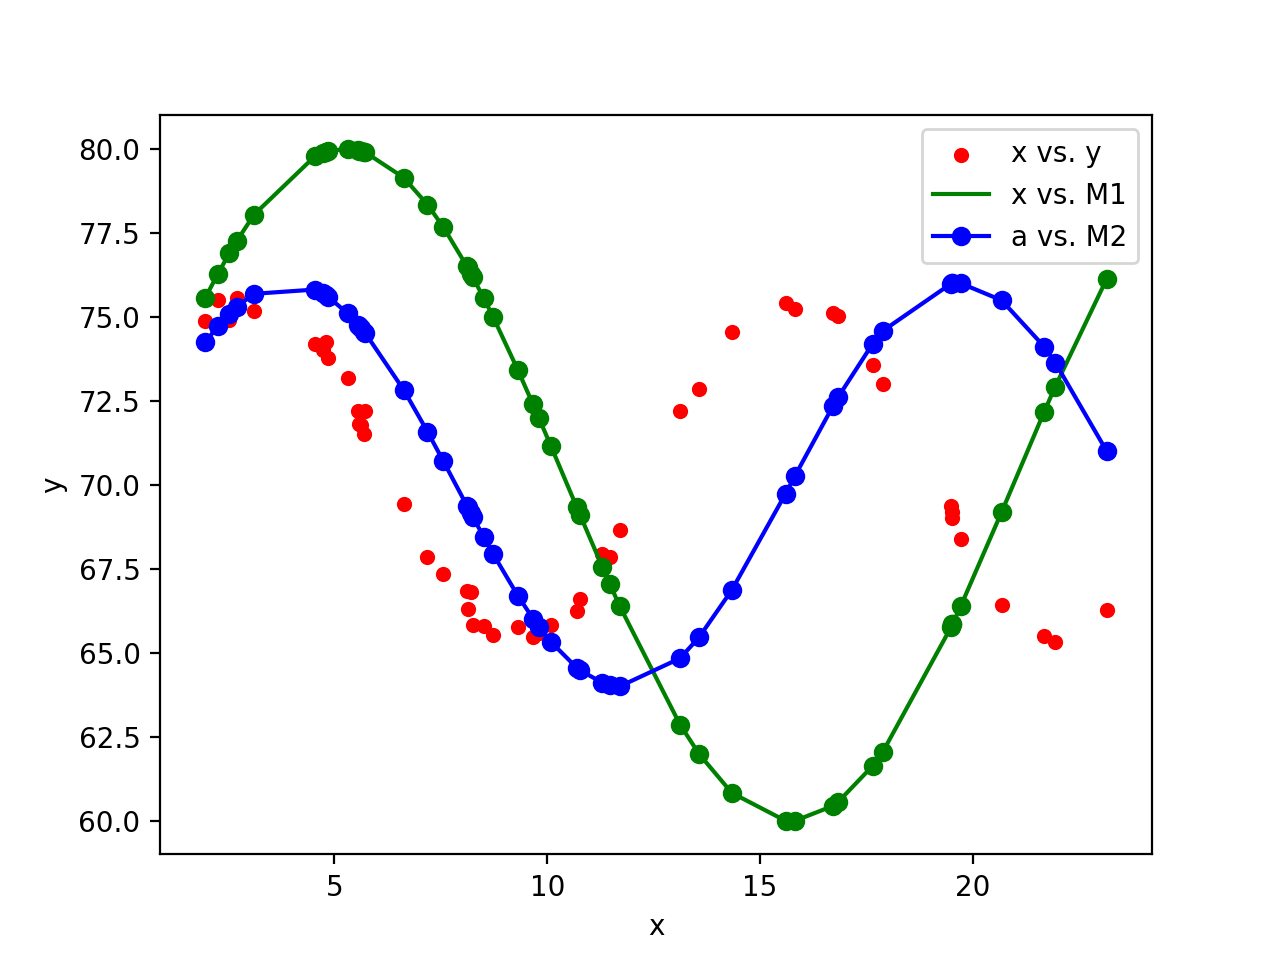

In [49]:
ax1 = df.plot(kind='scatter', x='x', y='y', color='r', label="x vs. y")    
ax2 = df.plot(kind='line', x='x', y='M1', color='g', marker = 'o', ax=ax1, label="x vs. M1")    
ax3 = df.plot(kind='line', x='x', y='M2', color='b',marker = 'o', ax=ax1, label="a vs. M2")

Which of these two models are provideing a better predicition for y? Intuitively, a model is better if it has smaller predicition error on average. Therefore, we compare models by looking at the mean (average) squere error. 
Here we comput the mean squere error (MSE) of M1 and M2. Mean squer error for M1 is 68.055 and MSE for M2 is 17.59. So the predicition error of model M2 is smaller on average. So it is a better model.

In [32]:
MSE1 = (df['Error M1']**2).mean()
MSE2 = (df['Error M2']**2).mean()
print(MSE1, MSE2)

(68.05555771653394, 17.593595922927204)


This MSE is cost function of parameters $\theta_0,\theta_1$. Recall that the cost function is defined 

$$J(\theta_0,\theta_1) = \frac{1}{m} \sum_{i=1}^m (y_i-\hat y^1_i)^2 = \frac{1}{m} \sum_{i=1}^m (y_i-(70 +\theta_0 \sin(\theta_1 x))^2$$

In fact the above calculation shows that $J(10,0.3) = 68.055$ and $J(6,0.4) = 17.59$. So we the model M2 is a better model since it has a smaller cost function (which is in fact the MSE of M1). The cost function can be calculte again by

In [33]:
J1 =((df['y']-df['M1'])**2).sum()/len(df)
print(J1)

68.05555771653394


**Question: Why do we use square in defintion of cost function?**
**Answer:** Some of the errors are positve and some of them are negative. We use squre error to make every thing positive. Also, we can compute the derivate of cost function easily (which appear in gradient descent).

**Question: Compare the mean square error v.s mean absolute error**
**Answer**  The other alternative for cost function is mean absoulte error. In that case cost function is not differentiable any more. However, it reduce the effect of outliers. (it is similar to compareing the mode and mean)


### stochastic Gradient descent

As we discussed, we are looking for parameters $\theta_0$ and $\theta_1$ for which 
$$J(\theta_0,\theta_1) = \frac{1}{m} \sum_{i=1}^m (y_i-\hat y^1_i)^2 = \frac{1}{m} \sum_{i=1}^m (y_i-(70 +\theta_0 \sin(\theta_1 x))^2$$
is minimum. Gradient descent is a method to calculte the minimum of a function. 


Note that
$$\frac{\partial J}{\partial \theta_0} (\theta_0,\theta_1) =  \frac{1}{m} \sum_{i=1}^m - 2(y_i-(70 +\theta_0 \sin(\theta_1 x_i)) \cdot \sin(\theta_1 x_i)$$
$$\frac{\partial J}{\partial \theta_1} (\theta_0,\theta_1) =  \frac{1}{m} \sum_{i=1}^m - 2(y_i-(70 +\theta_0 \sin(\theta_1 x_i)))\cdot x_i \cdot \theta_0\cos(\theta_1 x)$$

Here $\frac{\partial J}{\partial \theta_1} (\theta_0,\theta_1)$ is partial derivative with respect to $\theta_1$ and $\sum_{i=1}^m$ is sumation over all ....

<IPython.core.display.Javascript object>


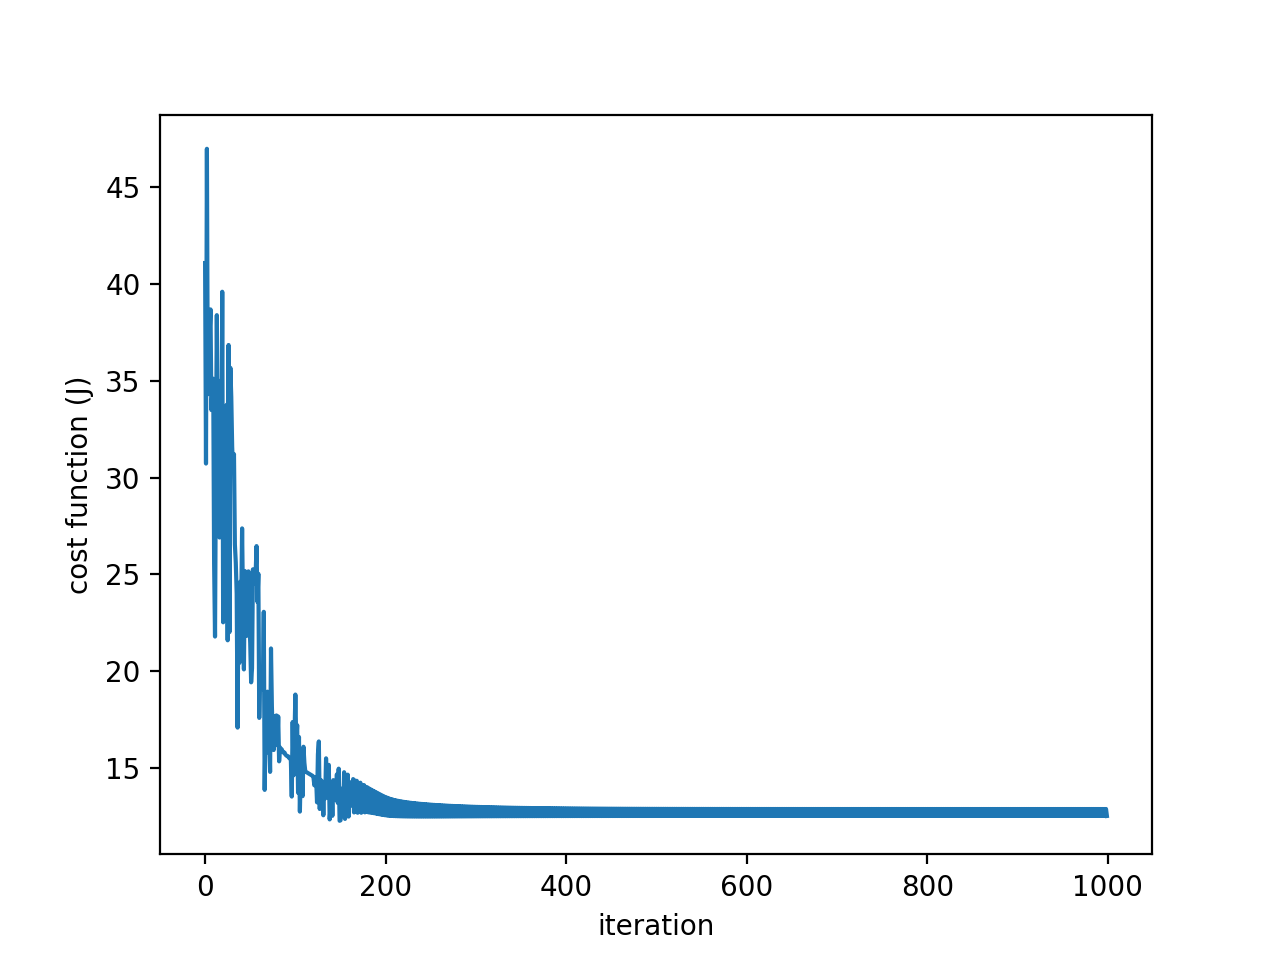

the optimal \theta_0, \theta_1, J is:
(1.3408519305284656, 2.783295217041027, 12.520949755103599)


In [34]:
X = np.array(df['x'])
Y = np.array(df['y'])

def DJ(theta0,theta1):
    '''
       compute the partial derivatives
    '''
    e = Y - (70+theta0*np.sin(theta1*X))
    J = (e**2).mean()
    d0 = -(2 * e * np.sin(theta1*X)).mean()
    d1 = -(2 * e * theta0 * np.cos(theta1*X) * X ).mean()
    return J, d0,d1

def SGD():
    theta0, theta1 =7 ,.3  # intial point
    a = .01  # learning rate
    cost = []
    for i in range(1000):
        J, d0,d1 = DJ(theta0,theta1) # find derivatives
        theta0 = theta0 -a*d0
        theta1 = theta1 -a*d1
        cost.append(J)
    return theta0,theta1,cost

theta0,theta1,cost = SGD()
plt.plot(cost)
plt.xlabel('iteration')
plt.ylabel('cost function (J)')
plt.show()

print( r'the optimal \theta_0, \theta_1, J is:' )
print(theta0,theta1,cost[-1])


    

In [28]:
# df['M_opt'] = 70 + theta0*np.sin(theta1*df['x'])
# ax1 = df.plot(kind='scatter', x='x', y='y', color='r', label="x vs. y")    
# ax2 = df.plot(kind='line', x='x', y='M_opt', color='g', marker = 'o', ax=ax1, label="x vs. M_opt")

# Page visit time: Linear Model:

As a second example, we look at a linear model. Suppose facebook is intersted to build a simple model to predict how long a user might spend in his FB page during one day. In this model, we only use one feature in this prediction model which is number of freinds. So we define the predicition model as
$$
y = h_\theta(x) = \theta_0 + \theta_1 x
$$
where x is number of freinds for a user, and y is how long she is spedning in FB Page. This data is provided below. 

In [ ]:
x	y
484	58
548	62
362	49
327	52
363	54
411	51
406	58
415	59
339	53
284	47

**Question**

If $\theta_0 =20, \theta_1 = .1$ what is the predicition for the time that a user might spend in FB if she has 484 friends?\\

Answer: 20+ .1*484 = 68.4

What is the error in this prediciton?

Answer: 68.4 -58 = 10.4

Can you find the Mean square error for this parameters e.i $J(20,0.1)= ?$

Answers: 45.96
    

In [57]:
x = np.array([484, 548, 362, 327, 363, 411, 406, 415, 339, 284])
y = np.array([58, 62, 49, 52 , 53, 51, 58, 59, 52, 46])
pred_y = 20+ .1*x
error = pred_y - y
J = (error**2).mean()
print(J)


45.961000000000055


Now, we would like to eastimate the best choice for $\theta_0, theta_1$. We find the point at which the minimum of the cost function $J(\theta_0,\theta_1)$ occurs.

Here, we use the normal equation (which is solving least-square-error equation and implemnted
in *np.linalg.lstsq* function)



In [58]:
X = np.array(
[[1, 484],
 [1, 548],
 [1, 362],
 [1, 327],
 [1, 363],
 [1, 411],
 [1, 406],
 [1, 415],
 [1, 339],
 [1, 284]])

theta0,theta1 = np.linalg.lstsq(X,y)[0]



/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  del sys.path[0]


theta0, theta1
(32.16781883589463, 0.05542569475528145)




<IPython.core.display.Javascript object>


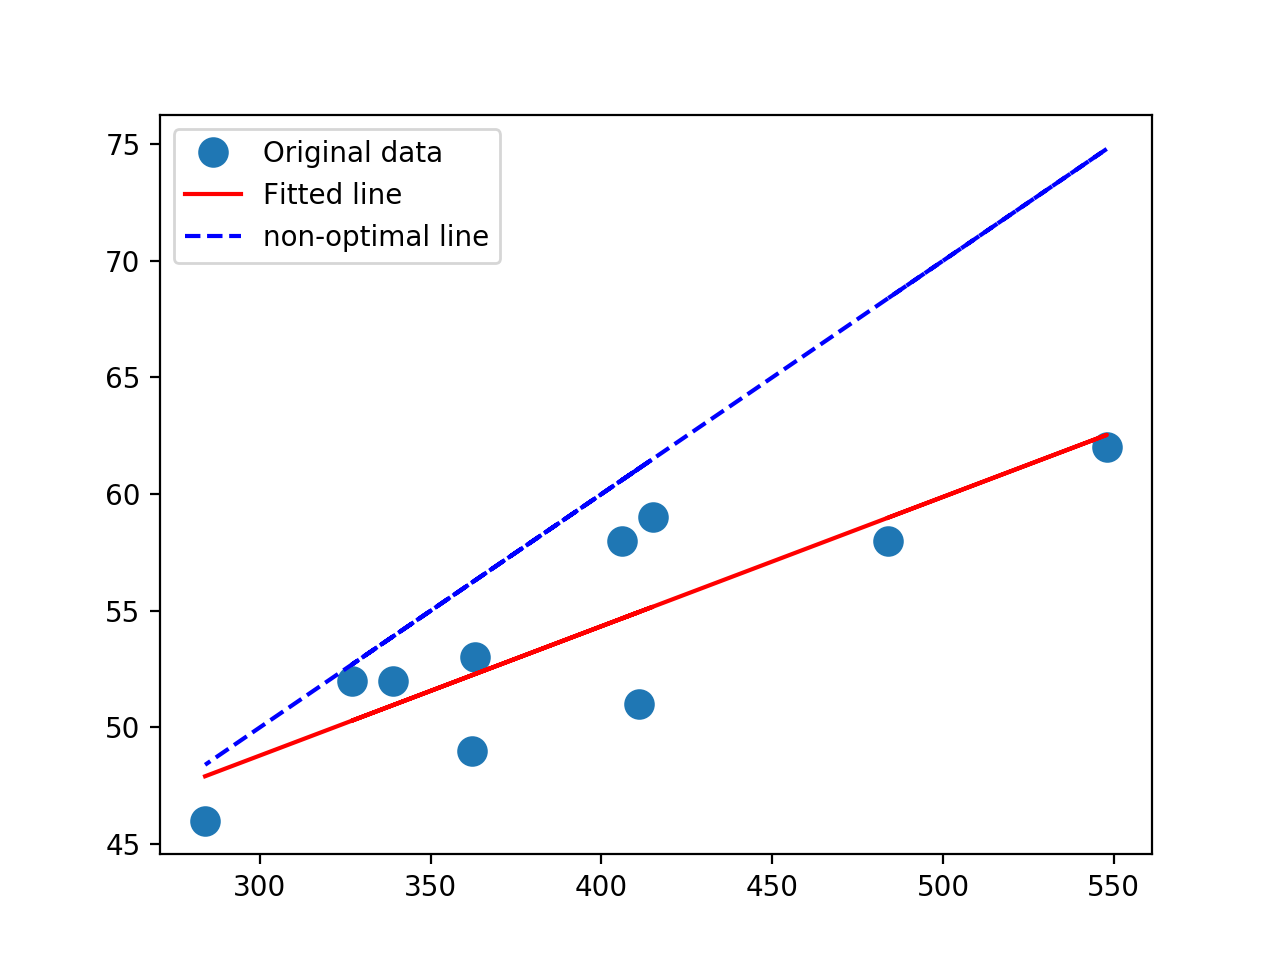

In [59]:
print('theta0, theta1')
print(theta0,theta1)
print('\n')
plt.plot(x, y, 'o', label='Original data', markersize=10)
plt.plot(x, theta1*x + theta0, 'r', label='Fitted line')
plt.plot(x, .1*x + 20, 'b--', label='non-optimal line')
plt.legend()
plt.show()

We can compute the cost function at the optimal points $J(32.167, 0.0554) = 6.12 < J(20,.1)=45.96$.  It means that on average the prediction error is less if we set the parameters as $\theta_0=32.167, \theta_1 =.0554$ 

In [60]:
pred_y = theta0+ theta1*x
error = pred_y - y
J_opt = (error**2).mean()
print(J2)

6.122408448135813


We can also use gredient desent method to find the minimizer of $J(\theta_0,\theta_1)$.

<IPython.core.display.Javascript object>


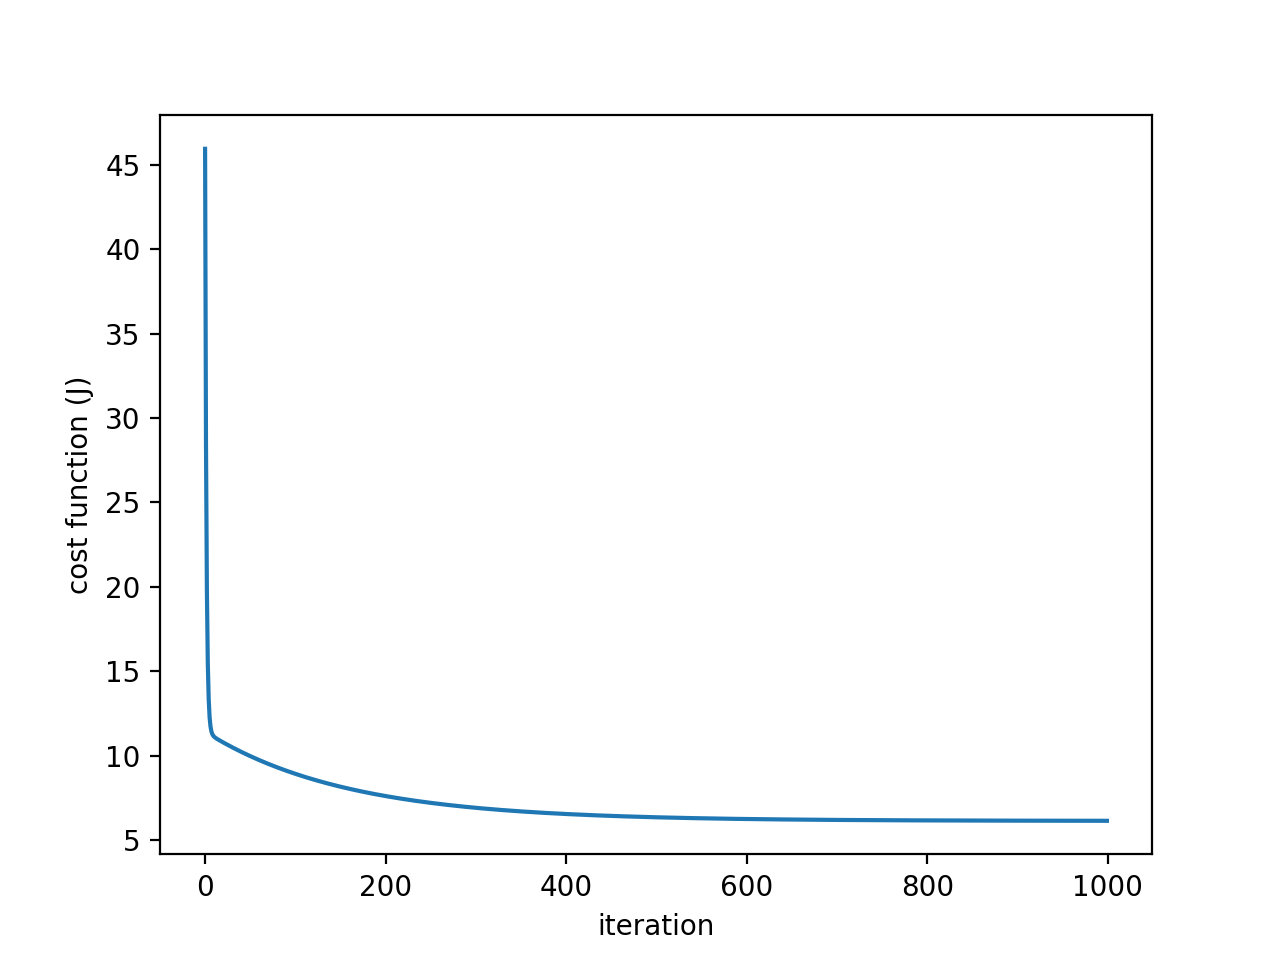

The optimal paramter estimated by SGD metheod:
(31.6546721266479, 0.056686891180262086)


In [88]:
def GD_L(x,y):
    theta_0 ,theta_1 = 20,.1
    cost = []
    a = .1      #learning rate
    for i in range(1000):
        error = theta_0 + theta_1*x  - y
        theta_0 = theta_0 - a * error.mean()
        theta_1 = theta_1 - a/10000 * (error * x).mean()
        J = (error**2).mean()
        cost.append(J)
    return theta_0 , theta_1, cost

theta_0 , theta_1 ,cost  = GD_L(x,y)

plt.plot(cost)
plt.xlabel('iteration')
plt.ylabel('cost function (J)')
plt.show()

print('The optimal paramter estimated by SGD metheod:')
print(theta_0 , theta_1)
    
    

You can comapre the result with the answers of normal equation solutions. Also, play with learning rate (parameter a) in the code. you can observe the the result is highly sensitve to choosing the parameter a.

#### Multi-linear Model
Notes that we can easily extend this model to a multi-linear model to caputer other features. For example, suppose $x_1$ represnts number of friends, $x_2$ shows age of the user, $x_3$ is zero one (dummy) variable if the user male or female, etc.
The model will be
$$
y = \theta_0 + \theta_1 x_1 + \theta_2 x_2+ \theta_3
$$
So if $\theta_0 = 30, \theta_1 = .05, \theta_2 = 2 , \theta_3 = -10$, for a 20 year old girl who has 300 friends, the model predict she will spend 75 minutes. 


In [43]:
30 + .05*300 + 2*20 -10

75.0